## Install the needed Libraries

In [1]:
!pip install xgboost
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.7 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Download The Language Files form NLTK

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading The dataset and EDA

In [10]:
df = pd.read_csv('/kaggle/input/spam-emails/spam.csv')
df.sample(5)

,Category,Message
1807,spam,Todays Voda numbers ending 1225 are selected t...
1007,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
376,ham,Can you say what happen
2286,ham,"Hi, wkend ok but journey terrible. Wk not good..."
5425,ham,Otherwise had part time job na-tuition..


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
df.duplicated().sum()

415

In [14]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
# check for data labels balance
df.Category.value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

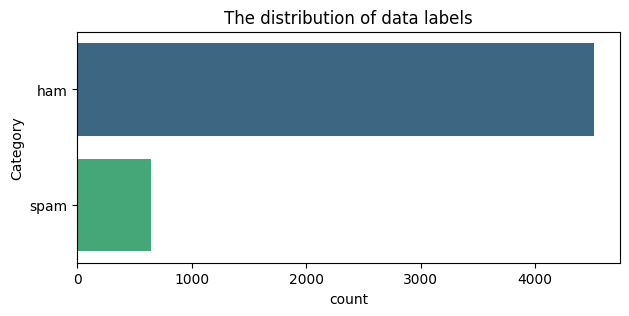

In [17]:
plt.figure(figsize=(7,3))
sns.countplot(y= df['Category'], palette='viridis')
plt.title('The distribution of data labels')
plt.show()

* ##### The data is not balanced but I tried the down sampling in another notebook so, this time I will try to keep it as it is. 

You can check the results of trying the down sampling in this notebook:

[Spam Emails Classification](https://www.kaggle.com/code/mennatullaheisawy/spam-emails-classification-using-spacy-testacc-94?scriptVersionId=191146746)

## Data Prepration and Text Preprocessing

1. Preprocess the text using NLTK English Modules
2. Vectorize the Messages inside the Message column using TFIDF-Vectrozier
3. Define X, and Y
4. Encode the Lables in Y :
    * 0 : ham
    * 1 : spam
5. Split data to train and test


In [18]:
# Define the stop words
stop_words = set(stopwords.words("english"))

In [19]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
lemma = WordNetLemmatizer()
def preprocessing(text):
    tokens = word_tokenize(text)
    words = []
    for token in tokens:
        if token.isalpha() and token not in stop_words:
            words.append(lemma.lemmatize(token))
    return " ".join(words)

In [21]:
df['Preprocessed_Message'] = df['Message'].apply(preprocessing)
df.sample(5)

,Category,Message,Preprocessed_Message
4333,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY,ALSO TELL HIM I SAID HAPPY BIRTHDAY
868,spam,PRIVATE! Your 2003 Account Statement for 07808...,PRIVATE Your Account Statement XXXXXX show poi...
1815,ham,HI ITS JESS I DONT KNOW IF YOU ARE AT WORK BUT...,HI ITS JESS I DONT KNOW IF YOU ARE AT WORK BUT...
344,ham,Am not interested to do like that.,Am interested like
1186,ham,Annoying isn't it.,Annoying


In [22]:
X = df['Preprocessed_Message']
y = df['Category']

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Machine Learning Models

In [26]:
# Prepare a dataframe to save the models' accuracies in it
results = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Test_Accuracy'])
results

,Model,Train_Accuracy,Test_Accuracy


#### 1- Logistec Regression

In [62]:
model = LogisticRegression(solver='liblinear', penalty='l1', C=3, max_iter=400)
model.fit(X_train,y_train)

LogisticRegression(C=3, max_iter=400, penalty='l1', solver='liblinear')

In [65]:
y_pred = model.predict(X_test)
tr_acc = model.score(X_train, y_train)
te_acc = accuracy_score(y_pred, y_test)

print(tr_acc)
print(te_acc)

0.9871515151515151
0.9651162790697675


In [64]:
model_name = str(model).split('(')[0]
new_row = pd.DataFrame([[model_name, tr_acc, te_acc]], columns=results.columns)
results = pd.concat([results, new_row], ignore_index=True)

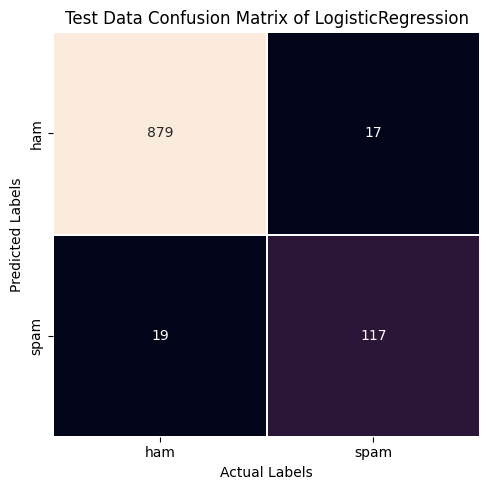

In [67]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.00f', xticklabels=['ham','spam'], yticklabels=['ham','spam'], linewidths=0.2, cbar=False)
plt.title(f'Test Data Confusion Matrix of {model_name}')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.tight_layout()
plt.show()

#### 2- XGBoost Classifier

In [80]:
model = XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [81]:
y_pred = model.predict(X_test)
tr_acc = model.score(X_train, y_train)
te_acc = accuracy_score(y_pred, y_test)

print(tr_acc)
print(te_acc)

0.9932121212121212
0.9738372093023255


In [82]:
model_name = str(model).split('(')[0]
new_row = pd.DataFrame([[model_name, tr_acc, te_acc]], columns=results.columns)
results = pd.concat([results, new_row], ignore_index=True)

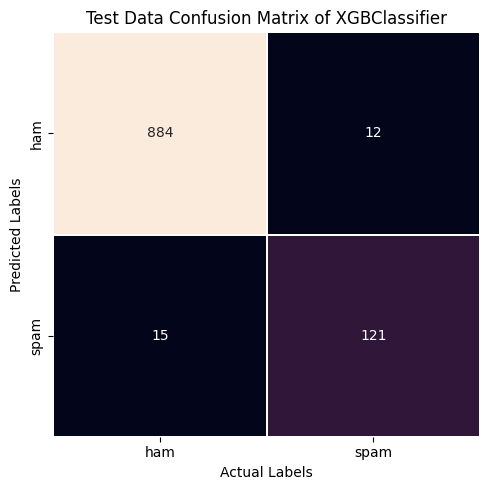

In [83]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.00f', xticklabels=['ham','spam'], yticklabels=['ham','spam'], linewidths=0.2, cbar=False)
plt.title(f'Test Data Confusion Matrix of {model_name}')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.tight_layout()
plt.show()

#### 3- Naive Bayes Classifier

In [108]:
model = MultinomialNB(alpha=0.5, force_alpha=True)
model.fit(X_train,y_train)

MultinomialNB(alpha=0.5)

In [109]:
y_pred = model.predict(X_test)
tr_acc = model.score(X_train, y_train)
te_acc = accuracy_score(y_pred, y_test)

print(tr_acc)
print(te_acc)

0.9835151515151516
0.9806201550387597


In [110]:
model_name = str(model).split('(')[0]
new_row = pd.DataFrame([[model_name, tr_acc, te_acc]], columns=results.columns)
results = pd.concat([results, new_row], ignore_index=True)

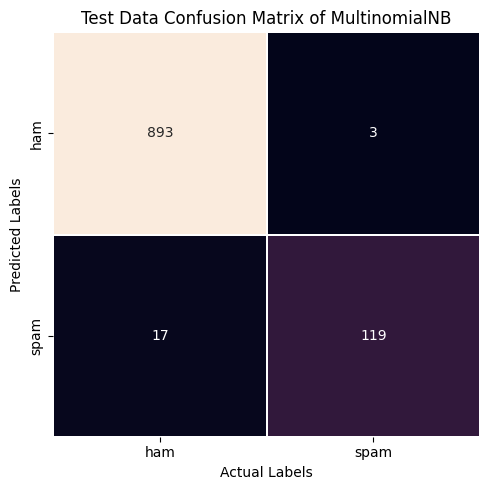

In [111]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.00f', xticklabels=['ham','spam'], yticklabels=['ham','spam'], linewidths=0.2, cbar=False)
plt.title(f'Test Data Confusion Matrix of {model_name}')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.tight_layout()
plt.show()

#### 4- Support Vector Classifier

In [124]:
model = SVC(C=1, random_state=42)
model.fit(X_train,y_train)

SVC(C=1, random_state=42)

In [125]:
y_pred = model.predict(X_test)
tr_acc = model.score(X_train, y_train)
te_acc = accuracy_score(y_pred, y_test)

print(tr_acc)
print(te_acc)

0.9956363636363637
0.9728682170542635


In [126]:
model_name = str(model).split('(')[0]
new_row = pd.DataFrame([[model_name, tr_acc, te_acc]], columns=results.columns)
results = pd.concat([results, new_row], ignore_index=True)

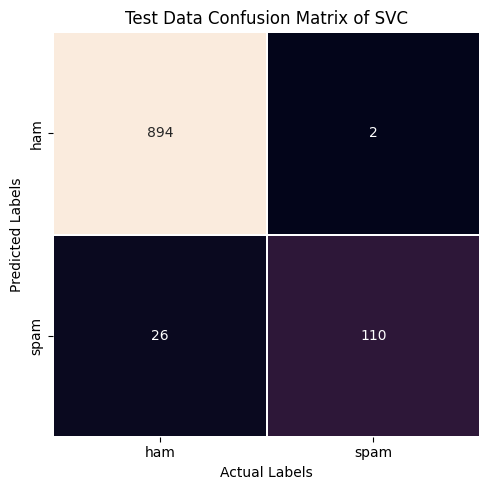

In [127]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.00f', xticklabels=['ham','spam'], yticklabels=['ham','spam'], linewidths=0.2, cbar=False)
plt.title(f'Test Data Confusion Matrix of {model_name}')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.tight_layout()
plt.show()

## Concolusion

I have tried 4 different models with different hyperparameters and these are the best results that I can get from this dataset.

* The Multinomial Naive Bayes Classifier gave me the best Accuracies and results regarding the TP, TN, FP, FN numbers
* Despite the SVC has as same accuracies as the XGB, but it is biased to the 'spam' class which makes it not the best predictor of future data

In [128]:
results

,Model,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.987152,0.965116
1,XGBClassifier,0.993212,0.973837
2,MultinomialNB,0.983515,0.980620
3,SVC,0.995636,0.972868


### Thank You!